<a href="https://colab.research.google.com/github/mwinzie/Financial-Outcomes/blob/master/Moringa_Data_Science_Core_W1_Independent_Project_2019_08_Agnes_Mueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



In [0]:
#importing the pandas library
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns


In [3]:
#installing the researchpy
pip install researchpy

## Reading the dataset

In [0]:
#loading the dataset

economic = pd.read_csv('Financial Dataset.csv')


## **Checking the Dataset**

In [73]:
# Determining the no. of records in our dataset
#
print('This dataset has ' + str(economic.shape[0]) + ' rows, and ' + str(economic.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [75]:
# Previewing the top of the dataset
economic.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [76]:
# Previewing the bottom of the dataset
economic.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [77]:
# Checking whether each column has an appropriate datatype
economic.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Tidying the Dataset

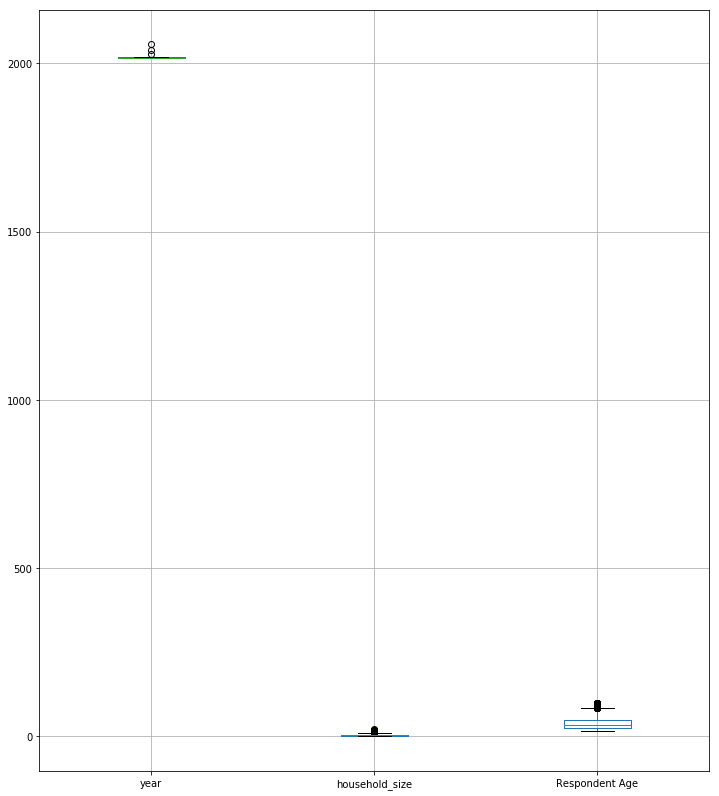

In [79]:
# Checking the dataset for outliers

economic.boxplot(figsize=(12,14))

## More Data Cleaning

In [54]:
#changing all columns names to lower case 
economic.columns = map(str.lower, economic.columns)
economic.columns

Index(['country', 'year', 'uniqueid', 'has a bank account', 'type of location',
       'cell phone access', 'household_size', 'respondent age',
       'gender_of_respondent', 'the relathip with head', 'marital_status',
       'level of educuation', 'type of job'],
      dtype='object')

In [55]:
#replace ' '(space) with '_'
economic.columns = economic.columns.str.strip().str.replace(' ','_')
economic.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [56]:
#renaming
economic.rename(columns= {'the_relathip_with_head':'relationship_with_head', 'level_of_educuation':'level_of _education'}, inplace = True)
economic.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of _education', 'type_of_job'],
      dtype='object')

In [0]:
#dropping the rows that are unnecessary 
economic.drop(['uniqueid'], axis = 1, inplace = True)

country                    object
year                        int64
has_a_bank_account         object
type_of_location           object
cell_phone_access          object
household_size            float64
respondent_age            float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
level_of _education        object
type_of_job                object
dtype: object

In [62]:
#checking for null values
economic.isna().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of _education       29
type_of_job               30
dtype: int64

In [63]:
#dropping all null values
neweconomic = economic.dropna()
neweconomic.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of _education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [66]:
neweconomic.shape

(23340, 12)

In [65]:
economic.country.value_counts()

Rwanda      8734
Tanzania    6606
Kenya       6066
Uganda      2101
Name: country, dtype: int64

In [59]:
economic.year.value_counts()

2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [0]:
#dropping the years that do not fall under the research study
#assigning the variable x to years 
x = economic[economic['year'] > 2018].index
economic.drop(x, inplace = True)


In [61]:
economic.year.value_counts()

2016    8734
2018    8167
2017    6620
Name: year, dtype: int64

In [49]:
neweconomic.country.value_counts()

Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64

In [71]:
neweconomic.cell_phone_access.value_counts()

Yes    17331
No      6009
Name: cell_phone_access, dtype: int64

In [0]:
df.groupby('country')['Level of Educuation'].value_counts()

In [82]:
for i in neweconomic.columns:
  print('\n')
  print(neweconomic[i].value_counts())



Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64


2016    8683
2018    8157
2017    6500
Name: year, dtype: int64


No     20044
Yes     3296
Name: has_a_bank_account, dtype: int64


Rural    14263
Urban     9077
Name: type_of_location, dtype: int64


Yes    17331
No      6009
Name: cell_phone_access, dtype: int64


2.0     5072
1.0     3928
3.0     3513
4.0     3199
5.0     2716
6.0     2028
7.0     1378
8.0      740
9.0      354
10.0     191
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64


30.0     1043
35.0      831
25.0      785
28.0      742
32.0      707
40.0      682
20.0      622
26.0      611
18.0      583
23.0      580
27.0      566
45.0      561
22.0      560
24.0      558
38.0      551
33.0      526
34.0      515
29.0      514
17.0      474
21.0      469
19.0      466
31.0      462
16.0      459
